In [ ]:
# importação de módulos Python
import numpy as np
import scipy.signal as sp
from  scipy.fftpack import fft, fftshift
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Projeto de filtros IIR
- Definir especificações do filtro para cada sinal
- Testar para 3 aproximações a escolha
- Avaliar ordem dos filtros
- Traçar as respostas em frequência de cada filtro (comparar)
- Traçar os respectivos diagramas de polos e zeros
- Filtrar os sinais de temperatura e umidade (apresentar os gráficos de antes de depois da filtragem

In [ ]:
# As especificações do filtro devem ser modificadas de acordo
gp = 1     # delta p nos slides... passband gain (dB)
gs = 30    # - delta s nos slides... stopband gain (actually, minimum attenuation, in dB)

fss = 1500       # sampling frequency (Hz)
fp2 = [200,400]    # passband frequency 02  (Hz)
fs2 = [251,351]     # stopband frequency 02  (Hz)
# -------------------------------------------------

fn = fss/2    # Nyquist frequency

#wp = fp2#fp2/fn   # normalised passband frequency 02
#ws = fs2#/fn   # normalised stopband frequency 02

# Projeto de filtro IIR
#    The type of IIR filter to design:
#            Butterworth : ‘butter’
#            Chebyshev I : ‘cheby1’
#            Chebyshev II : ‘cheby2’
#            Cauer/elliptic: ‘ellip’
#            Bessel/Thomson: ‘bessel’
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html
filtype = 'butter'  # qual aproximation
b, a = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, 2**12, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

In [ ]:
print('Ordem do filtro: ', len(a)-1)

Ordem do filtro:  6


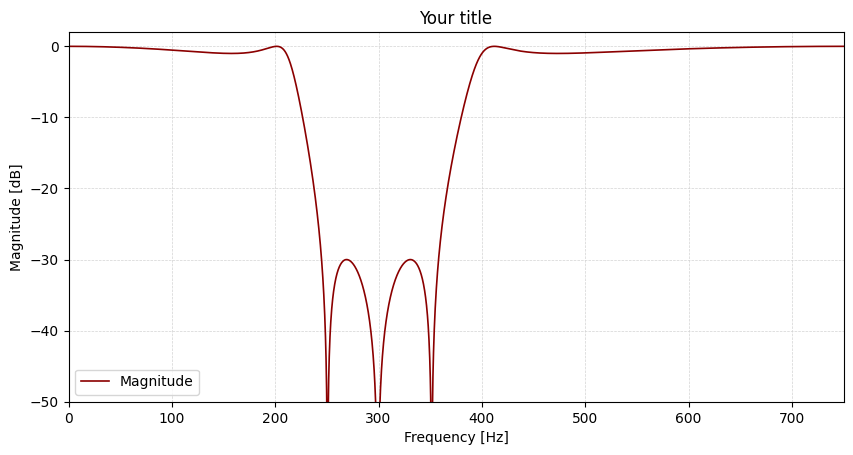

In [ ]:
# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Your title')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,750, -50,2])
## Gera legenda
plt.legend()
plt.show()

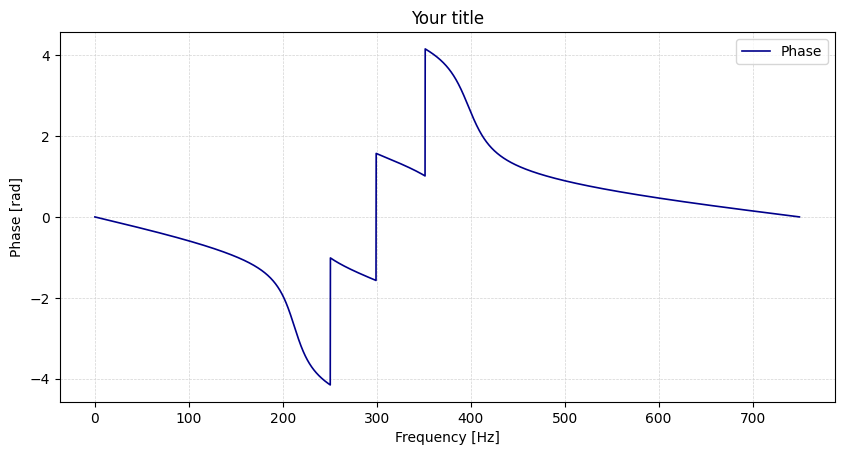

In [ ]:
# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_ang , linewidth = 1.20, label = 'Phase', color='darkblue')
plt.title('Your title')
plt.ylabel('Phase [rad]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
#plt.axis([450,550, -32,-28])
## Gera legenda
plt.legend()
plt.show()